<a href="https://colab.research.google.com/github/Gltknzk/My_Works_DL/blob/master/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

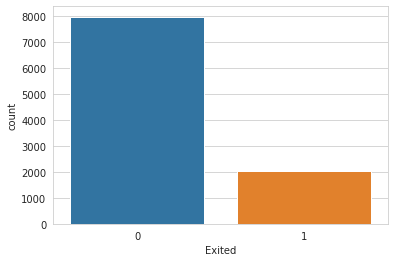

In [7]:
sns.countplot(df["Exited"])

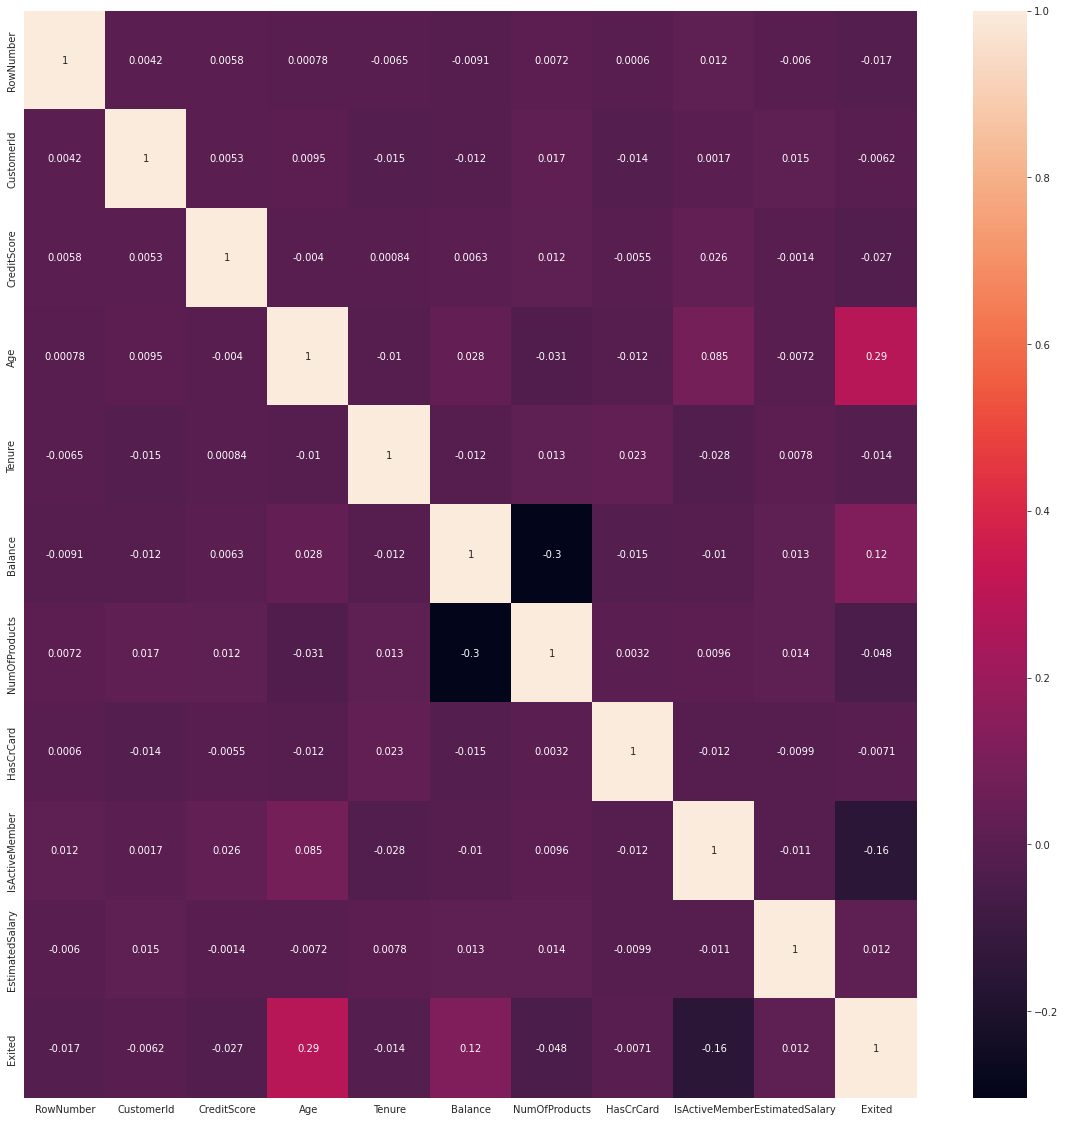

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

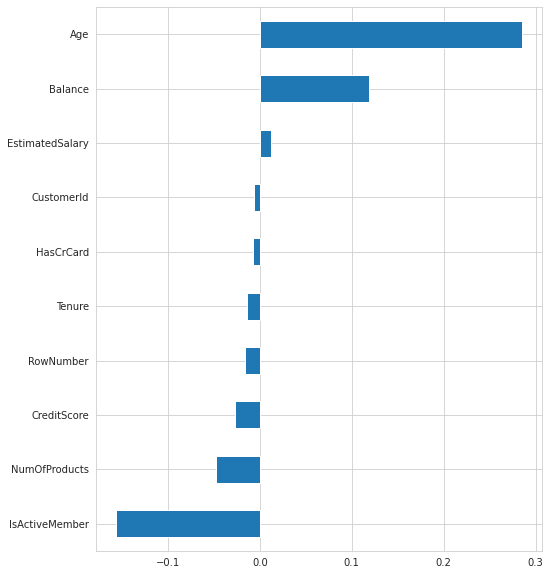

In [9]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [10]:
drop_list=["RowNumber","CustomerId","Surname"]

In [11]:
df=df.drop(drop_list, axis=1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [13]:
df=pd.get_dummies(df
               ,columns = ['Geography',"Gender",]
               ,drop_first = True
               )

# Preprocessing of Data
- Train | Test Split, Scalling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
seed=41

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

## without class_weigth

In [21]:
X_train.shape

(9000, 11)

In [22]:
X_test.shape

(1000, 11)

### Create The Model

In [23]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [24]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [25]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 400, verbose=1)

Epoch 1/400
270/270 [==============================] - 3s 6ms/step - loss: 0.5173 - accuracy: 0.7784 - val_loss: 0.4663 - val_accuracy: 0.8000
Epoch 2/400
270/270 [==============================] - 1s 4ms/step - loss: 0.4568 - accuracy: 0.7996 - val_loss: 0.4353 - val_accuracy: 0.8178
Epoch 3/400
270/270 [==============================] - 1s 4ms/step - loss: 0.4392 - accuracy: 0.8151 - val_loss: 0.4198 - val_accuracy: 0.8289
Epoch 4/400
270/270 [==============================] - 1s 5ms/step - loss: 0.4282 - accuracy: 0.8217 - val_loss: 0.4199 - val_accuracy: 0.8222
Epoch 5/400
270/270 [==============================] - 1s 4ms/step - loss: 0.4230 - accuracy: 0.8260 - val_loss: 0.4091 - val_accuracy: 0.8333
Epoch 6/400
270/270 [==============================] - 1s 4ms/step - loss: 0.4187 - accuracy: 0.8258 - val_loss: 0.4026 - val_accuracy: 0.8367
Epoch 7/400
270/270 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8344 - val_loss: 0.3895 - val_accuracy: 0.8389

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                432       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.517,0.778,0.466,0.800
1,0.457,0.800,0.435,0.818
2,0.439,0.815,0.420,0.829
3,0.428,0.822,0.420,0.822
4,0.423,0.826,0.409,0.833


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

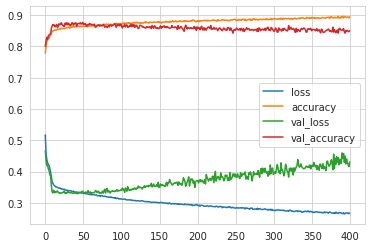

In [28]:
loss_df.plot();

In [29]:
model.evaluate(X_test, y_test, verbose=0)

[0.40568485856056213, 0.843999981880188]

In [30]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.40568485856056213
accuracy :  0.843999981880188


In [31]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[746  50]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.66      0.48      0.56       204

    accuracy                           0.84      1000
   macro avg       0.77      0.71      0.73      1000
weighted avg       0.83      0.84      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [32]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [39]:

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [40]:
from sklearn.utils import class_weight

In [44]:
class_weights=class_weight.compute_class_weight("balanced",classes=np.unique(y_train),y=y_train)
class_weights={0:class_weights[0], 1:class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [45]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 30, epochs = 300, verbose=1,class_weight=class_weights)

Epoch 1/300
270/270 [==============================] - 3s 6ms/step - loss: 0.6517 - accuracy: 0.5935 - val_loss: 0.6071 - val_accuracy: 0.6878
Epoch 2/300
270/270 [==============================] - 1s 4ms/step - loss: 0.6021 - accuracy: 0.6823 - val_loss: 0.5871 - val_accuracy: 0.6856
Epoch 3/300
270/270 [==============================] - 1s 4ms/step - loss: 0.5895 - accuracy: 0.6951 - val_loss: 0.5720 - val_accuracy: 0.7056
Epoch 4/300
270/270 [==============================] - 1s 4ms/step - loss: 0.5826 - accuracy: 0.7074 - val_loss: 0.5526 - val_accuracy: 0.7200
Epoch 5/300
270/270 [==============================] - 1s 4ms/step - loss: 0.5784 - accuracy: 0.7125 - val_loss: 0.5563 - val_accuracy: 0.7189
Epoch 6/300
270/270 [==============================] - 2s 6ms/step - loss: 0.5740 - accuracy: 0.7179 - val_loss: 0.5191 - val_accuracy: 0.7556
Epoch 7/300
270/270 [==============================] - 1s 3ms/step - loss: 0.5674 - accuracy: 0.7240 - val_loss: 0.5870 - val_accuracy: 0.6911

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                432       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.652,0.593,0.607,0.688
1,0.602,0.682,0.587,0.686
2,0.590,0.695,0.572,0.706
3,0.583,0.707,0.553,0.720
4,0.578,0.712,0.556,0.719


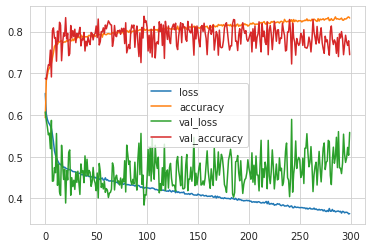

In [48]:
loss_df.plot();

In [49]:
model.evaluate(X_test, y_test, verbose=0)

[0.5127058625221252, 0.7730000019073486]

In [50]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5127058625221252
accuracy :  0.7730000019073486


In [51]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[621 175]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       796
           1       0.46      0.75      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

Early Stop

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [60]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [61]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.5201 - accuracy: 0.7783 - val_loss: 0.4683 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4585 - accuracy: 0.8000 - val_loss: 0.4376 - val_accuracy: 0.8167
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8137 - val_loss: 0.4239 - val_accuracy: 0.8244
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4304 - accuracy: 0.8199 - val_loss: 0.4207 - val_accuracy: 0.8189
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.8232 - val_loss: 0.4120 - val_accuracy: 0.8267
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8253 - val_loss: 0.4062 - val_accuracy: 0.8300
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8306 - val_loss: 0.3954 - val_accuracy:

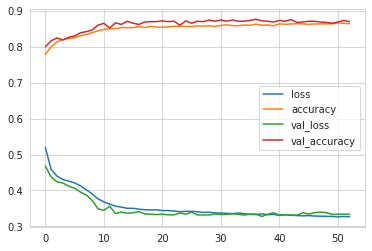

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33080723881721497
accuracy :  0.8679999709129333


In [64]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[781  15]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       796
           1       0.85      0.43      0.57       204

    accuracy                           0.87      1000
   macro avg       0.86      0.70      0.75      1000
weighted avg       0.87      0.87      0.85      1000



### Add Dropout Layer

In [65]:
from tensorflow.keras.layers import Dropout

In [66]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [67]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6177 - accuracy: 0.7283 - val_loss: 0.5179 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7933 - val_loss: 0.4841 - val_accuracy: 0.8000
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5218 - accuracy: 0.7953 - val_loss: 0.4815 - val_accuracy: 0.8000
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.7959 - val_loss: 0.4786 - val_accuracy: 0.8000
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5003 - accuracy: 0.7959 - val_loss: 0.4676 - val_accuracy: 0.8000
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.7962 - val_loss: 0.4626 - val_accuracy: 0.8000
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4914 - accuracy: 0.7959 - val_loss: 0.4578 - val_accuracy:

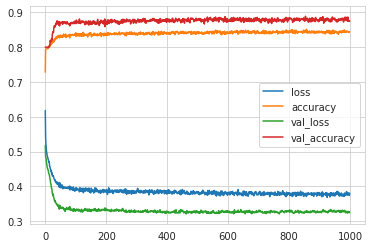

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3274165689945221
accuracy :  0.871999979019165


In [70]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[774  22]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.82      0.48      0.60       204

    accuracy                           0.87      1000
   macro avg       0.85      0.73      0.76      1000
weighted avg       0.87      0.87      0.86      1000



#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

In [71]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [72]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [73]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [74]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.5140 - accuracy: 0.7800 - val_loss: 0.4611 - val_accuracy: 0.7960
Epoch 2/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.8036 - val_loss: 0.4274 - val_accuracy: 0.8290
Epoch 3/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4337 - accuracy: 0.8170 - val_loss: 0.4061 - val_accuracy: 0.8350
Epoch 4/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8237 - val_loss: 0.3972 - val_accuracy: 0.8430
Epoch 5/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8287 - val_loss: 0.3982 - val_accuracy: 0.8330
Epoch 6/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8309 - val_loss: 0.3923 - val_accuracy: 0.8380
Epoch 7/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.8326 - val_loss: 0.3883 - val_accuracy:

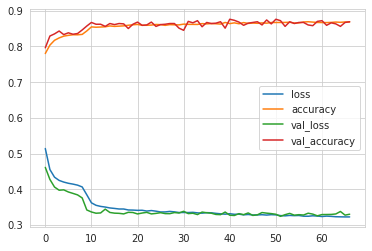

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [76]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.324032187461853
accuracy :  0.871999979019165


In [77]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[774  22]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.82      0.48      0.60       204

    accuracy                           0.87      1000
   macro avg       0.85      0.73      0.76      1000
weighted avg       0.87      0.87      0.86      1000



In [78]:
model.save('model_stayer_leaver.h5')

In [79]:
from tensorflow.keras.models import load_model

In [83]:
model_stayer_leaver = load_model('model_stayer_leaver.h5')


## Prediction

In [84]:
sample = df.drop('Exited', axis = 1).iloc[0:1, :]
sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0


In [85]:
(model_stayer_leaver.predict(sample) > 0.5).astype("int32")

array([[0]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___